In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [209]:
# Importing Train Dataset
df = pd.read_csv('train.csv')

In [210]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [211]:
df.shape

(381109, 12)

In [212]:
# Dropping id column from the dataset.
df.drop('id', axis = 1 , inplace = True)

In [213]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [214]:
df.shape

(381109, 11)

In [215]:
# checking for null values
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [216]:
# checking for duplicate values
dups = df.duplicated().sum()
print ('No. of Duplciate rows=%d' %(dups))

No. of Duplciate rows=269


In [217]:
# Removing these duplicate rows
df.drop_duplicates(inplace=True)

In [218]:
dups = df.duplicated().sum()
print ('No. of Duplciate rows=%d' %(dups))

No. of Duplciate rows=0


In [219]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000
mean,38.823593,0.997868,26.388307,0.458208,30584.016078,112.030225,154.344607,0.122584
std,15.513206,0.046126,13.229907,0.498251,17203.258664,54.206194,83.670240,0.327960
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24426.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31678.500000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [220]:
#By looking at the descriptive staistics , it shows that there are some outliers present in our dataset.

# Data is normally distributed in Annual_premium , region_code.

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380840 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                380840 non-null  object 
 1   Age                   380840 non-null  int64  
 2   Driving_License       380840 non-null  int64  
 3   Region_Code           380840 non-null  float64
 4   Previously_Insured    380840 non-null  int64  
 5   Vehicle_Age           380840 non-null  object 
 6   Vehicle_Damage        380840 non-null  object 
 7   Annual_Premium        380840 non-null  float64
 8   Policy_Sales_Channel  380840 non-null  float64
 9   Vintage               380840 non-null  int64  
 10  Response              380840 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [222]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)
        print(df[i].value_counts(normalize=True))
        print('\n')

Gender
Male      0.540747
Female    0.459253
Name: Gender, dtype: float64


Vehicle_Age
1-2 Year     0.525593
< 1 Year     0.432389
> 2 Years    0.042018
Name: Vehicle_Age, dtype: float64


Vehicle_Damage
Yes    0.504876
No     0.495124
Name: Vehicle_Damage, dtype: float64




In [223]:
df['Response'].value_counts(normalize=True)

0    0.877416
1    0.122584
Name: Response, dtype: float64

Text(0.5, 1.0, 'Response counts')

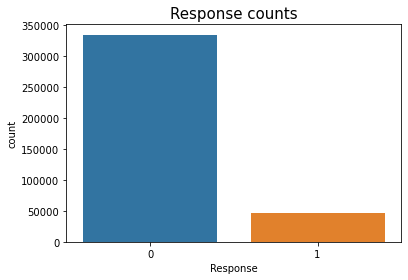

In [224]:
# Buliding one countplot for the target variable Response

uplot = sns.countplot(x= 'Response' , data = df)
uplot.set_title("Response counts",fontsize=15)

In [225]:
#Our Target or dependent varaible is imbalanced.We will treat this problem of imbalance dataset as we move forward.


In [226]:
# Performing Univariate and Bi variate Analysis


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Response')

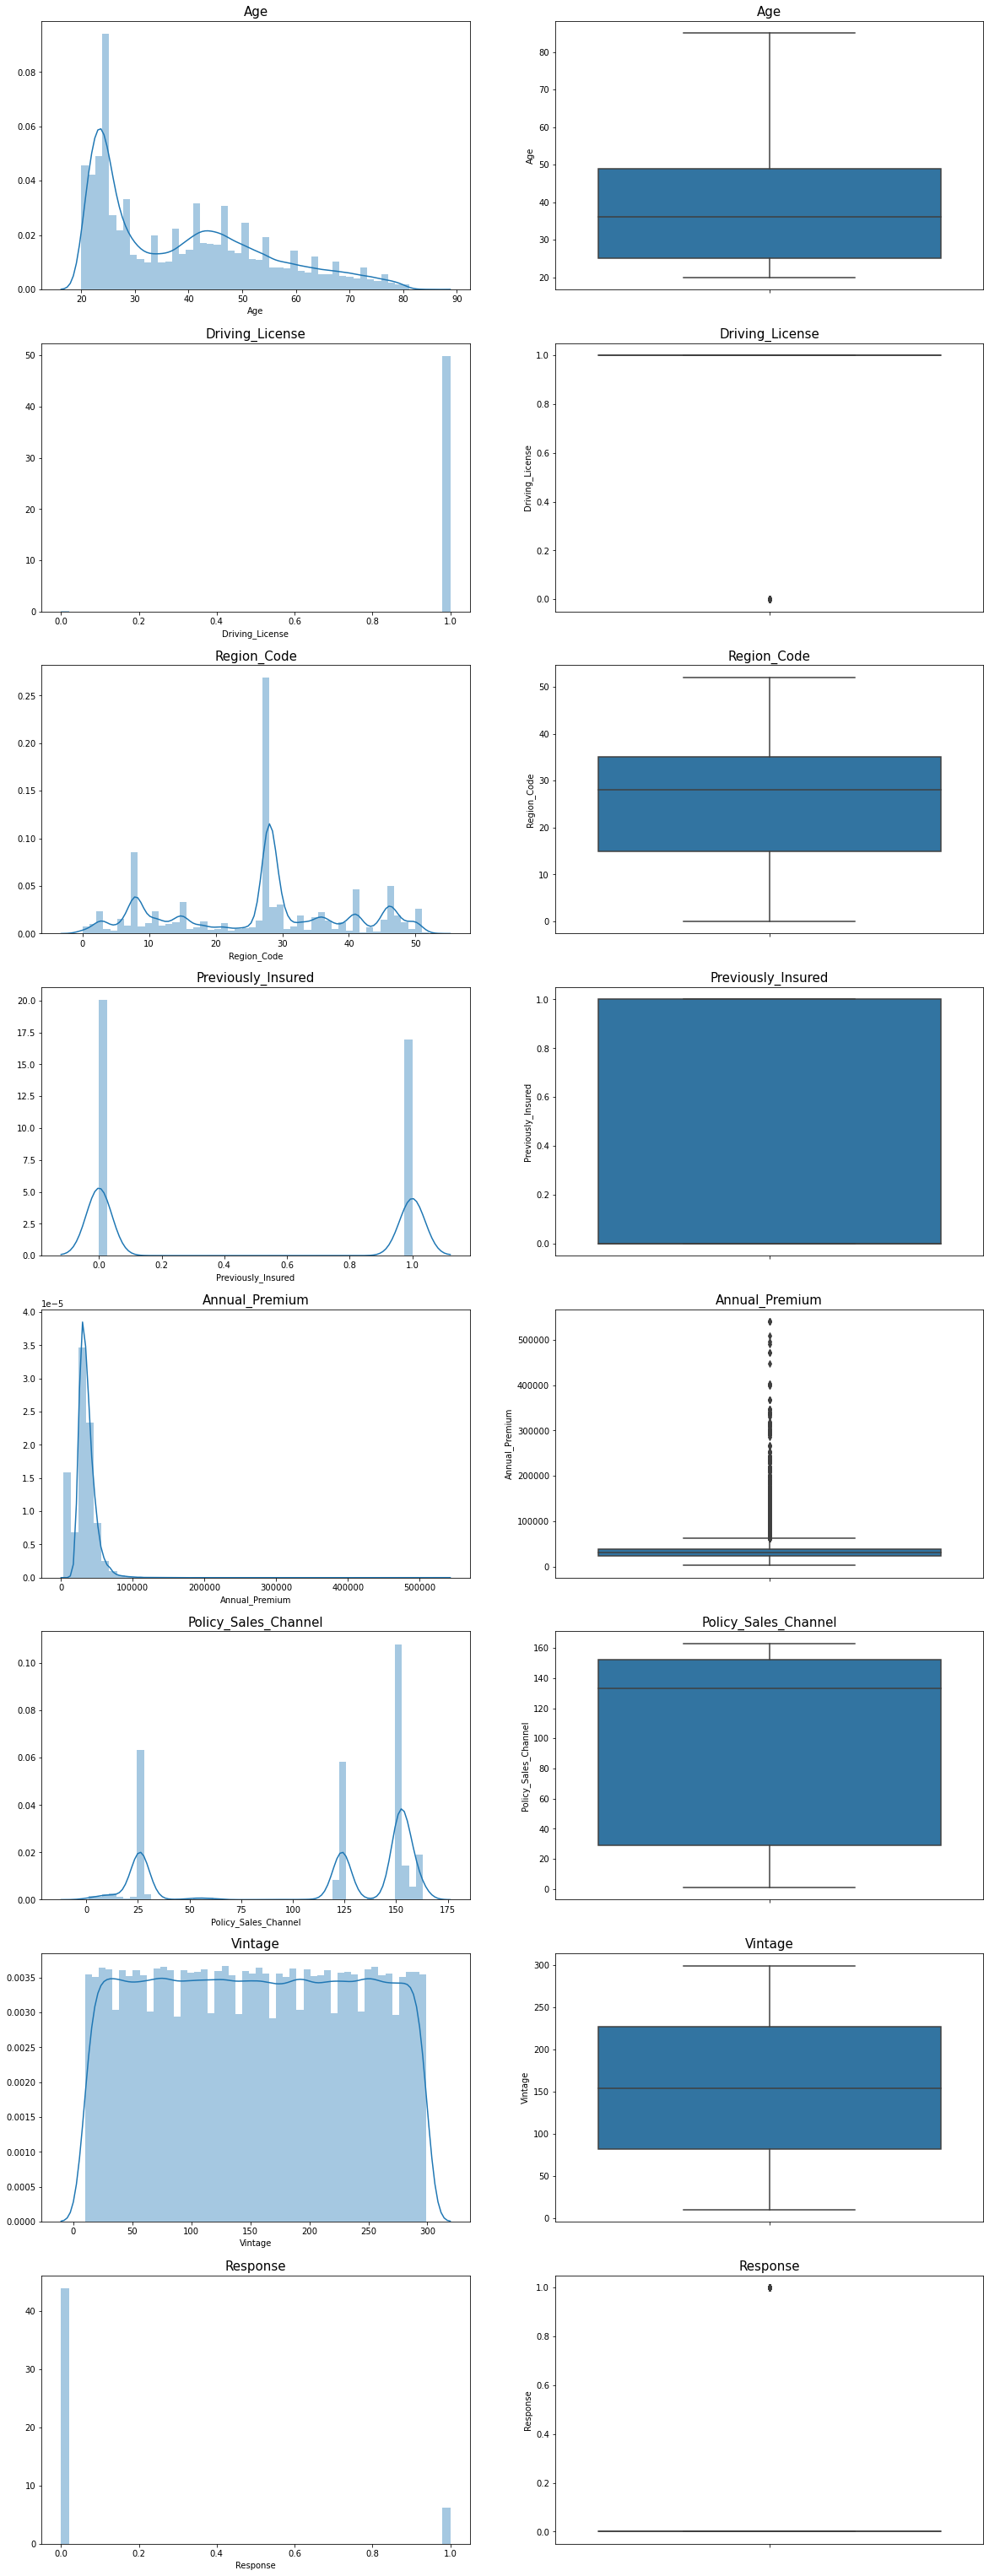

In [227]:
fig ,axes = plt.subplots (nrows = 8 , ncols =2)
fig.set_size_inches(20 , 55)

uplot = sns.distplot(df['Age'] ,ax =axes [0][0])
uplot.set_title('Age',fontsize =15)
uplot = sns.boxplot(df['Age'],ax = axes[0][1] ,orient= 'v' )
uplot.set_title('Age',fontsize = 15)

uplot = sns.distplot(df['Driving_License'] ,ax =axes [1][0])
uplot.set_title('Driving_License',fontsize =15)
uplot = sns.boxplot(df['Driving_License'],ax = axes[1][1] , orient= 'v')
uplot.set_title('Driving_License',fontsize = 15)

uplot = sns.distplot(df['Region_Code'] , ax= axes[2][0])
uplot.set_title('Region_Code',fontsize =15)
uplot = sns.boxplot(df['Region_Code'], ax = axes[2][1] , orient= 'v' )
uplot.set_title('Region_Code',fontsize = 15)

uplot = sns.distplot(df['Previously_Insured'] , ax= axes[3][0])
uplot.set_title('Previously_Insured',fontsize =15)
uplot = sns.boxplot(df['Previously_Insured'], ax = axes[3][1] , orient= 'v' )
uplot.set_title('Previously_Insured',fontsize = 15)


uplot = sns.distplot(df['Annual_Premium'] , ax= axes[4][0])
uplot.set_title('Annual_Premium',fontsize =15)
uplot = sns.boxplot(df['Annual_Premium'], ax = axes[4][1] , orient= 'v')
uplot.set_title('Annual_Premium',fontsize = 15)

uplot = sns.distplot(df['Policy_Sales_Channel'] , ax= axes[5][0])
uplot.set_title('Policy_Sales_Channel',fontsize =15)
uplot = sns.boxplot(df['Policy_Sales_Channel'], ax = axes[5][1] , orient= 'v')
uplot.set_title('Policy_Sales_Channel',fontsize = 15)

uplot = sns.distplot(df['Vintage'] , ax= axes[6][0])
uplot.set_title('Vintage',fontsize =15)
uplot = sns.boxplot(df['Vintage'], ax = axes[6][1] , orient= 'v' )
uplot.set_title('Vintage',fontsize = 15)


uplot = sns.distplot(df['Response'] , ax= axes[7][0])
uplot.set_title('Response',fontsize =15)
uplot = sns.boxplot(df['Response'], ax = axes[7][1] , orient= 'v' )
uplot.set_title('Response',fontsize = 15)




In [228]:
# 1. Annual Premium has many outliers present.
# 2. Our dataset contains people from age group 20- 30 mostly.

Text(0.5, 1.0, 'vote')

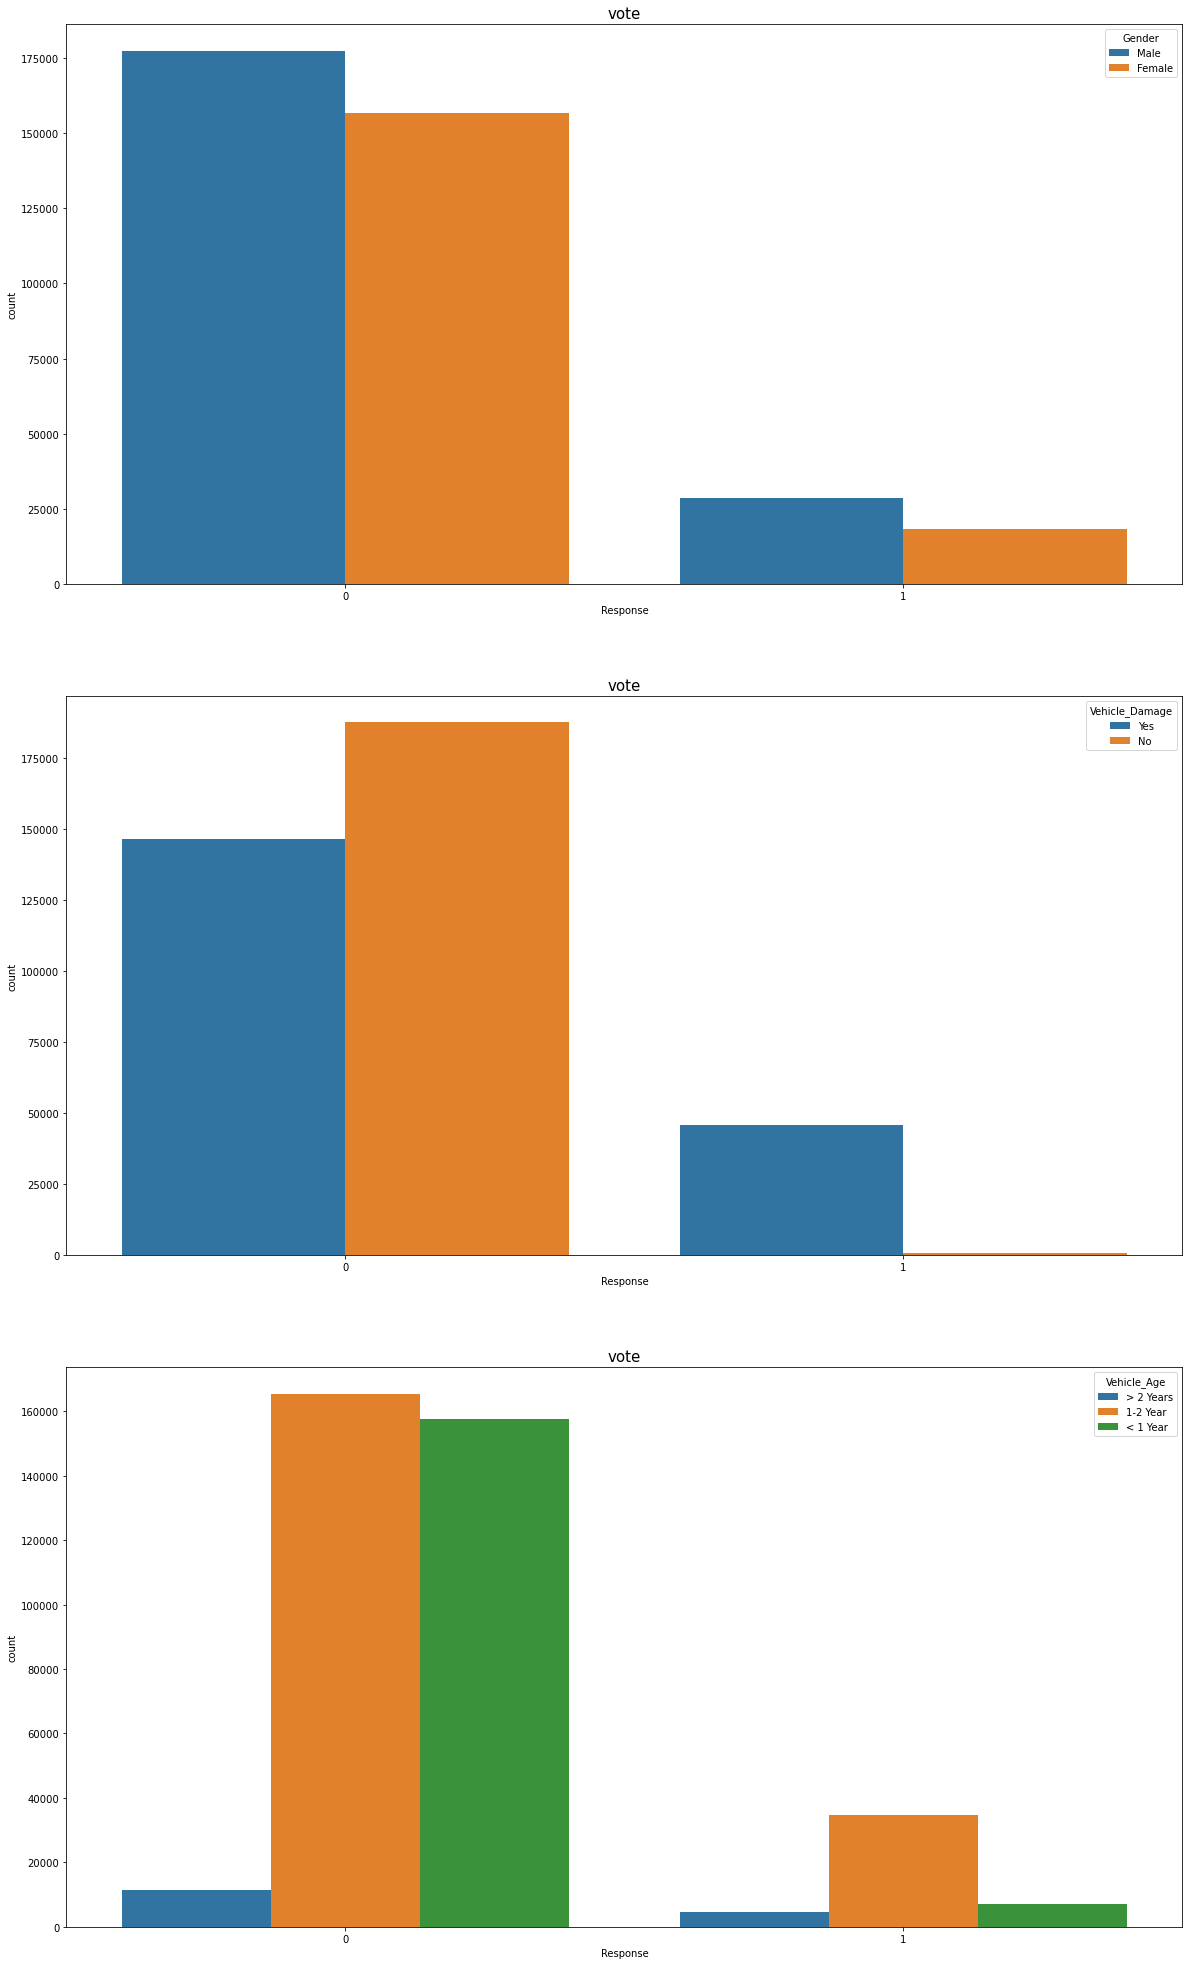

In [229]:
# Bi Variate Analysis

fig, axes = plt.subplots(nrows=3)
fig.set_size_inches(20, 35)

uplot = sns.countplot(x= 'Response' , data = df , hue= 'Gender' , ax= axes[0])
uplot.set_title("vote",fontsize=15)

uplot = sns.countplot(x= 'Response' ,hue ='Vehicle_Damage' , data = df , ax= axes[1])
uplot.set_title("vote",fontsize=15)

uplot = sns.countplot(x= 'Response' ,hue ='Vehicle_Age' , data = df , ax= axes[2])
uplot.set_title("vote",fontsize=15)

In [230]:
# Inference from above plots - 

# Mostly ,Both Male and female are not intrested in vehicle insurance
# One intresting point is that the number of not intrested customers are more in the case of vehicle damage.

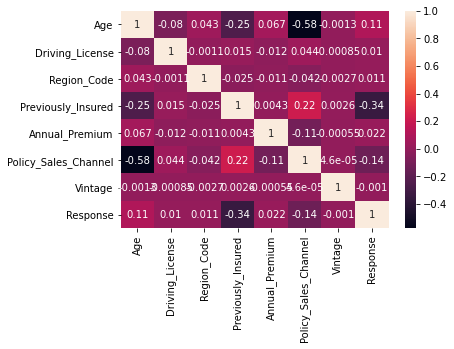

In [231]:
# Multivariate Analysis-
# Lets check for coorelation between variables

fig.set_size_inches(20, 35)
sns.heatmap(df.corr(),annot=True)
plt.show()

In [232]:
# Above heat map shows that variable are not very much correlated. Although few varaibles are negatively correlated. Like 
# Policy sales channel and response.

In [233]:
# checking for outliers columnwise -

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
Outliers = ((df <(Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
Outliers


Age                         0
Annual_Premium          10331
Driving_License           812
Gender                      0
Policy_Sales_Channel        0
Previously_Insured          0
Region_Code                 0
Response                46685
Vehicle_Age                 0
Vehicle_Damage              0
Vintage                     0
dtype: int64

In [234]:
IQR

Age                        24.0
Driving_License             0.0
Region_Code                20.0
Previously_Insured          1.0
Annual_Premium          14982.0
Policy_Sales_Channel      123.0
Vintage                   145.0
Response                    0.0
dtype: float64

In [235]:
#There are outliers present in our dataset. Lets treat these outlers in the variable Annual_Premium and Driving_Licesnse

In [236]:
# Treating outliers by defining custom function to calculate upper and lower values
def remove_outlier(col):
    sorted(col)
    Q1 , Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1-(1.5 * IQR)
    Upper_range = Q3+(1.5 * IQR)
    return lower_range , Upper_range

In [237]:
lAnnual_premium,uAnnual_premium =remove_outlier(df['Annual_Premium'])
df['Annual_Premium']=np.where(df['Annual_Premium']>uAnnual_premium,uAnnual_premium,df['Annual_Premium'])
df['Annual_Premium']=np.where(df['Annual_Premium']<lAnnual_premium,lAnnual_premium,df['Annual_Premium'])

lDriving_License,uDriving_License=remove_outlier(df['Driving_License'])
df['Driving_License']=np.where(df['Driving_License']>uDriving_License,uDriving_License,df['Driving_License'])
df['Driving_License']=np.where(df['Driving_License']<lDriving_License,lDriving_License,df['Driving_License'])


In [238]:
# Checking the outliers column wise
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers

Age                         0
Annual_Premium              0
Driving_License             0
Gender                      0
Policy_Sales_Channel        0
Previously_Insured          0
Region_Code                 0
Response                46685
Vehicle_Age                 0
Vehicle_Damage              0
Vintage                     0
dtype: int64

In [239]:
# With the custom function we have treated the outliers.

In [240]:
#Since Gender , vehicle age and vehicle damage is our categorical data. Lets perform one hot encoding for these.
dummy = pd.get_dummies(data = df[['Gender' , 'Vehicle_Damage' ]] , drop_first=True)
dummy.head()

,Gender_Male,Vehicle_Damage_Yes
0,1,1
1,1,0
2,1,1
3,1,0
4,0,0


In [241]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['Vehicle_Age']= label_encoder.fit_transform(df['Vehicle_Age']) 

In [242]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1.0,28.0,0,2,Yes,40454.0,26.0,217,1
1,Male,76,1.0,3.0,0,0,No,33536.0,26.0,183,0
2,Male,47,1.0,28.0,0,2,Yes,38294.0,26.0,27,1
3,Male,21,1.0,11.0,1,1,No,28619.0,152.0,203,0
4,Female,29,1.0,41.0,1,1,No,27496.0,152.0,39,0


In [243]:
df = pd.concat([df , dummy] ,axis = 1 )
 #We have done one hot encoding so now , we can drop the column gender , vehicle age from our dataset
df = df.drop(columns =['Gender' ,'Vehicle_Damage'], axis =1)

In [244]:
df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
0,44,1.0,28.0,0,2,40454.0,26.0,217,1,1,1
1,76,1.0,3.0,0,0,33536.0,26.0,183,0,1,0
2,47,1.0,28.0,0,2,38294.0,26.0,27,1,1,1
3,21,1.0,11.0,1,1,28619.0,152.0,203,0,1,0
4,29,1.0,41.0,1,1,27496.0,152.0,39,0,0,0


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380840 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   380840 non-null  int64  
 1   Driving_License       380840 non-null  float64
 2   Region_Code           380840 non-null  float64
 3   Previously_Insured    380840 non-null  int64  
 4   Vehicle_Age           380840 non-null  int64  
 5   Annual_Premium        380840 non-null  float64
 6   Policy_Sales_Channel  380840 non-null  float64
 7   Vintage               380840 non-null  int64  
 8   Response              380840 non-null  int64  
 9   Gender_Male           380840 non-null  uint8  
 10  Vehicle_Damage_Yes    380840 non-null  uint8  
dtypes: float64(4), int64(5), uint8(2)
memory usage: 39.8 MB


In [246]:
# Notice here in data preprocessing we are not going to scale the data as we are going to use NB Model. And for NB model 
# data scaling is not required.

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
X = df.drop(['Response','Age'],axis = 1)
y = df['Response']

In [249]:
X.head()

,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Damage_Yes
0,1.0,28.0,0,2,40454.0,26.0,217,1,1
1,1.0,3.0,0,0,33536.0,26.0,183,1,0
2,1.0,28.0,0,2,38294.0,26.0,27,1,1
3,1.0,11.0,1,1,28619.0,152.0,203,1,0
4,1.0,41.0,1,1,27496.0,152.0,39,0,0


In [250]:
y.value_counts(normalize=True)

0    0.877416
1    0.122584
Name: Response, dtype: float64

In [251]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [252]:
#Gaussian Naive Bayes

In [253]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [254]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

0.8401728509910423
[[216379  17575]
 [ 25033   7601]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91    233954
           1       0.30      0.23      0.26     32634

    accuracy                           0.84    266588
   macro avg       0.60      0.58      0.59    266588
weighted avg       0.82      0.84      0.83    266588



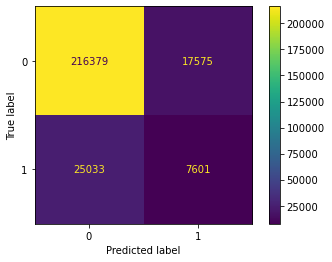

In [255]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)                                             # Accuracy
print(metrics.confusion_matrix(y_train, y_train_predict))      # confusion Matrix
print(metrics.classification_report(y_train , y_train_predict)) # classification Report
plot_confusion_matrix(NB_model , X_train , y_train)

In [256]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test , y_test)
print(model_score)
print(metrics.confusion_matrix(y_test ,y_test_predict))
print(metrics.classification_report(y_test ,y_test_predict))

0.8397752336939397
[[92698  7503]
 [10803  3248]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91    100201
           1       0.30      0.23      0.26     14051

    accuracy                           0.84    114252
   macro avg       0.60      0.58      0.59    114252
weighted avg       0.82      0.84      0.83    114252



In [257]:
# Few Important points to notice -
# 1. Our data set is imbalanced. For imbalanced dataset we need to focus more on precision , recall and f1 score and 
# not the accuracy of the model.
# 2. Here we will focus more on the Recall. As if the model is predicting that if the customer is not intrested 
# in the vehicle insurance and he is actually intrested then that will be a loss. 
# 3. Now going by the precision of the model we can see that 90 % of customers are actually not intrested in the 
# the insurance. and 34 % are intrested.
# 4. F1 score is 90 % for customers not intrested and 32 % customers are intrested.

# AUC and ROC curve for NB model

AUC_train: 0.819


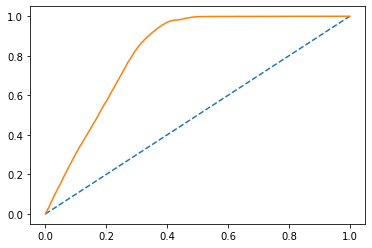

In [258]:
# For train Data
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[: ,1]
# Caluclate AUC
AUC_train = roc_auc_score(y_train , probs)
print('AUC_train: %.3f' % AUC_train)
# calculate roc curve
train_fpr , train_tpr ,train_thresholds = roc_curve(y_train , probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# PLot the roc curve for the model
plt.plot(train_fpr , train_tpr)

AUC_test: 0.820


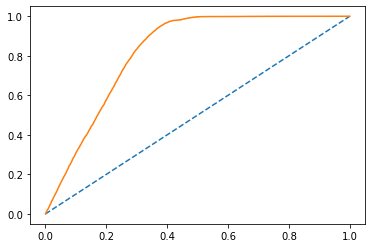

In [259]:
# For test Data
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[: ,1]
# Caluclate AUC
AUC_test = roc_auc_score(y_test , probs)
print('AUC_test: %.3f' % AUC_test)
# calculate roc curve
test_fpr , test_tpr ,test_thresholds = roc_curve(y_test , probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# PLot the roc curve for the model
plt.plot(test_fpr , test_tpr)

# Building Random Forest Classifier model 

In [260]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

In [261]:

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}


In [262]:
clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10,cv = 4, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101)

In [263]:
model.best_params_

{'n_estimators': 300,
 'min_samples_split': 7,
 'min_samples_leaf': 8,
 'max_depth': 3,
 'criterion': 'gini'}

In [264]:
model.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=7,
                       n_estimators=300)

In [265]:
best_rf_model =model.best_estimator_

0.8775863879844554
[[233954      0]
 [ 32634      0]]


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93    233954
           1       0.00      0.00      0.00     32634

    accuracy                           0.88    266588
   macro avg       0.44      0.50      0.47    266588
weighted avg       0.77      0.88      0.82    266588



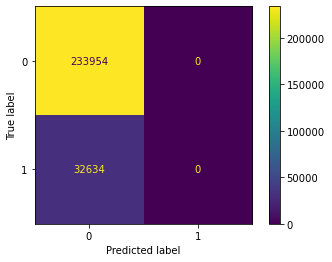

In [266]:
# Performance matrix on train data set
y_train_predict_RF = best_rf_model.predict(X_train)
model_score = best_rf_model.score(X_train , y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict_RF))
plot_confusion_matrix(best_rf_model , X_train , y_train)
print(metrics.classification_report(y_train ,y_train_predict_RF))

0.8770174701536954
[[100201      0]
 [ 14051      0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100201
           1       0.00      0.00      0.00     14051

    accuracy                           0.88    114252
   macro avg       0.44      0.50      0.47    114252
weighted avg       0.77      0.88      0.82    114252



/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


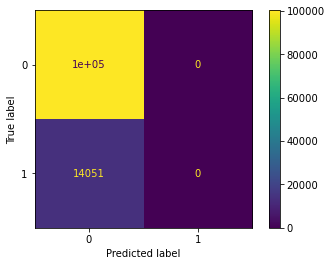

In [267]:
# Performance matrix on test data set
y_test_predict_RF = best_rf_model.predict(X_test)
model_score = best_rf_model.score(X_test , y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict_RF))
plot_confusion_matrix(best_rf_model , X_test , y_test)
print(metrics.classification_report(y_test ,y_test_predict_RF))

# AUC and ROC of Random forest model

AUC_train: 0.824


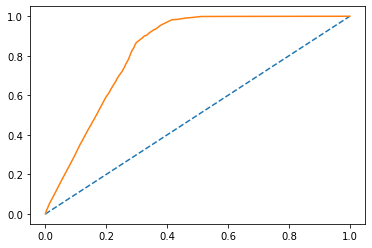

In [268]:
# For train Data
# predict probabilities
probs = best_rf_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[: ,1]
# Caluclate AUC
AUC_train = roc_auc_score(y_train , probs)
print('AUC_train: %.3f' % AUC_train)
# calculate roc curve
train_fpr , train_tpr ,train_thresholds = roc_curve(y_train , probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# PLot the roc curve for the model
plt.plot(train_fpr , train_tpr)

AUC_test: 0.825


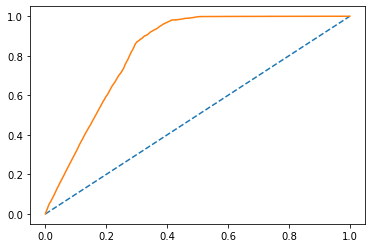

In [269]:
# For test Data
# predict probabilities
probs = best_rf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[: ,1]
# Caluclate AUC
AUC_test = roc_auc_score(y_test , probs)
print('AUC_test: %.3f' % AUC_test)
# calculate roc curve
test_fpr , test_tpr ,test_thresholds = roc_curve(y_test , probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# PLot the roc curve for the model
plt.plot(test_fpr , test_tpr)

In [270]:
#feature importance
print (pd.DataFrame(best_rf_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                           Imp
Vehicle_Damage_Yes    0.479119
Previously_Insured    0.349380
Policy_Sales_Channel  0.096042
Vehicle_Age           0.065688
Region_Code           0.006241
Gender_Male           0.001836
Annual_Premium        0.001670
Vintage               0.000025
Driving_License       0.000000


In [277]:
import pickle

In [278]:
pickle_out = open('model.pkl','wb')
pickle.dump(NB_model ,pickle_out)
pickle_out.close()


In [279]:
pickle_out = open('model1.pkl','wb')
pickle.dump(model ,pickle_out)
pickle_out.close()